In [1]:
import random

In [2]:
N = 5000  # N = Number of sessions (MAX = 10,000)
S = 10000 # S = Number of attendees. (MAX = 100,000)
K = 25 # K = Number of sessions per attendee. (MAX = N for uniform and two-tiered distributions;  MAX = 0.1N for Skewed distribution and your distribution)
# DIST = UNIFORM | TIERED | SKEWED | YOURS


In [3]:
def session_uniform(N):
    return int(N*random.random())

def generate_uniform_dist(N, S, K):
     return [ [session_uniform(N) for i in range(K)] for _ in range(S)]

In [4]:
def session_tiered(N):
    if random.random() >.5:
        return int(int(.1 * N) * random.random())
    else:
        return int(.1 * N) + int(int(N-(.1 * N))*random.random())

def generate_tiered_dist(N, S, K):
    return [ [session_tiered(N) for i in range(K)] for _ in range(S)]

In [5]:
def session_custom(N):
    return int( int(N*random.random()) * random.random() )
def generate_custom_dist(N, S, K):
    return [ [session_custom(N) for i in range(K)] for _ in range(S)]

In [6]:
def session_skewed(N, skew):
    return skew[int(len(skew) * random.random())]
def generate_skewed_dist(N, S, K):
    skew = []
    for curr_session in range(N):
        for _ in range(N-curr_session):
            skew.append(curr_session)

    return [ [session_skewed(N, skew) for i in range(K)] for _ in range(S)]

In [7]:
def gen_session_attendees(attendees_sessions, N):
    session_attendees = [ [] for _ in range(N)]
    for attendee_index, attendee_sessions in enumerate(attendees_sessions):
        for session in attendee_sessions:
            session_attendees[session].append(attendee_index)
    return session_attendees
            
def gen_session_attendees_count(attendees_sessions, N):
    session_attendees = gen_session_attendees(attendees_sessions, N)
    return [len(attendees) for attendees in session_attendees]

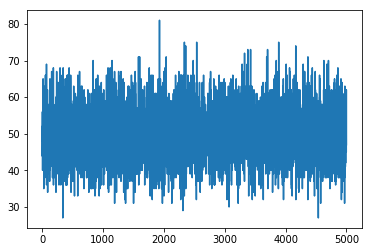

In [8]:
%matplotlib inline
import matplotlib.pyplot as plt

attendees_sessions_uniform = generate_uniform_dist(N, S, K)
session_attendees_uniform_count = gen_session_attendees_count(attendees_sessions_uniform, N)

plt.plot(session_attendees_uniform_count)

plt.show()

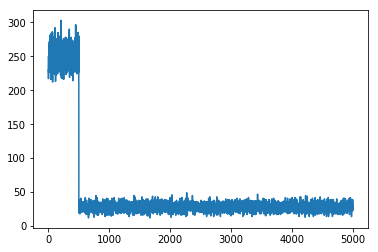

In [9]:
%matplotlib inline
import matplotlib.pyplot as plt

attendees_sessions_tiered = generate_tiered_dist(N, S, K)
session_attendees_tiered_count = gen_session_attendees_count(attendees_sessions_tiered, N)

plt.plot(session_attendees_tiered_count)

plt.show()

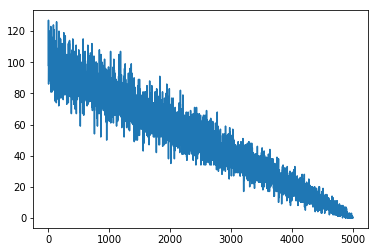

In [10]:
%matplotlib inline
import matplotlib.pyplot as plt

attendees_sessions_skewed = generate_skewed_dist(N, S, K)
session_attendees_skewed_count = gen_session_attendees_count(attendees_sessions_skewed, N)

plt.plot(session_attendees_skewed_count)

plt.show()

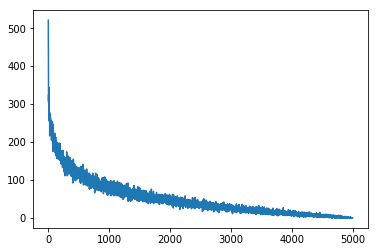

In [11]:
%matplotlib inline
import matplotlib.pyplot as plt

attendees_sessions_custom = generate_custom_dist(N, S, K)
session_attendees_custom_count = gen_session_attendees_count(attendees_sessions_custom, N)

plt.plot(session_attendees_custom_count)

plt.show()

In [12]:
# def gen_pairwise_conflicts(attendee_sessions):
#     conflicts = []
    
#     for x in range(len(attendee_sessions)):
#         for y in range(len(attendee_sessions)-x):
#             if attendee_sessions[x] is not attendee_sessions[y]:
#                 conflicts.append( (attendee_sessions[x], attendee_sessions[y]) )
#     return conflicts
                
# def gen_all_pairwise_conflicts(attendee_sessions):
#     all_conflicts = []
#     for attendee_sessions in attendes_sessions:
#         all_conflicts += gen_pairwise_conflicts(attendee_sessions)
#     return all_conflicts

In [13]:
from itertools import combinations

#TODO implement actual logic for this

def gen_pairwise_conflicts(attendee_sessions):
    return list(combinations(attendee_sessions, 2))

def gen_all_pairwise_conflicts(attendees_sessions):
    all_conflicts = []
    for attendee_sessions in attendees_sessions:
        all_conflicts += gen_pairwise_conflicts(attendee_sessions)
    return all_conflicts


In [14]:
conflicts = gen_all_pairwise_conflicts(attendees_sessions_uniform)
conflicts

[(2858, 1787),
 (2858, 2819),
 (2858, 1561),
 (2858, 2263),
 (2858, 3776),
 (2858, 4990),
 (2858, 994),
 (2858, 3779),
 (2858, 3338),
 (2858, 3629),
 (2858, 4698),
 (2858, 116),
 (2858, 543),
 (2858, 842),
 (2858, 4026),
 (2858, 4070),
 (2858, 4027),
 (2858, 3799),
 (2858, 849),
 (2858, 176),
 (2858, 4829),
 (2858, 3229),
 (2858, 3868),
 (2858, 1209),
 (1787, 2819),
 (1787, 1561),
 (1787, 2263),
 (1787, 3776),
 (1787, 4990),
 (1787, 994),
 (1787, 3779),
 (1787, 3338),
 (1787, 3629),
 (1787, 4698),
 (1787, 116),
 (1787, 543),
 (1787, 842),
 (1787, 4026),
 (1787, 4070),
 (1787, 4027),
 (1787, 3799),
 (1787, 849),
 (1787, 176),
 (1787, 4829),
 (1787, 3229),
 (1787, 3868),
 (1787, 1209),
 (2819, 1561),
 (2819, 2263),
 (2819, 3776),
 (2819, 4990),
 (2819, 994),
 (2819, 3779),
 (2819, 3338),
 (2819, 3629),
 (2819, 4698),
 (2819, 116),
 (2819, 543),
 (2819, 842),
 (2819, 4026),
 (2819, 4070),
 (2819, 4027),
 (2819, 3799),
 (2819, 849),
 (2819, 176),
 (2819, 4829),
 (2819, 3229),
 (2819, 3868)

In [15]:
def gen_session_conflicts_adj(conflicts, N):
    sessions_adj = [set() for _ in range(N)]
    for n1, n2 in conflicts:
        sessions_adj[n1].add(n2)
        sessions_adj[n2].add(n1)
    for x in range(N):
        if x in sessions_adj[x]:
            sessions_adj[x].remove(x)
    return [list(session) for session in sessions_adj]

In [16]:
session_conflicts_adj = gen_session_conflicts_adj(conflicts, N)
for x in session_conflicts_adj:
    print(len(x))

958
1111
1052
1018
1157
1125
1164
1074
1121
870
1061
1057
1113
1063
1151
1052
984
1347
1079
965
1224
1095
1057
918
988
1107
1175
1196
1181
779
1111
1072
1021
1224
1294
1054
1242
1048
1028
795
1279
1136
938
959
1107
1160
841
1123
882
1083
1003
1203
1088
1070
914
1030
1332
1054
1157
1300
913
1337
1241
1152
929
1166
1069
1077
994
1128
1068
1129
1096
1406
999
963
967
1034
1303
1022
797
895
969
1072
868
1096
875
956
1117
1292
877
1050
748
1091
991
1040
855
1200
1154
966
1071
874
1166
1028
1197
907
990
1122
882
1087
1086
982
905
1074
1095
981
927
1165
1168
1101
1088
894
1024
958
991
809
920
1031
1122
1102
1331
1106
1105
864
1079
1239
1153
1171
1013
901
984
872
1176
953
1272
1103
1114
1285
1028
1075
973
993
1118
1046
1149
1186
958
931
1345
1061
950
1270
1086
1056
1177
967
1143
1310
1076
1006
915
987
847
892
1195
1034
996
1205
1053
953
870
1123
1013
1247
1215
1017
1408
970
781
1043
1084
1197
990
879
1183
1038
913
1013
1105
912
1207
983
839
1134
1045
1059
1128
1003
954
1004
923
994
950
1029
109

928
1124
1103
1182
1010
924
910
981
1376
740
1051
860
939
975
1013
1053
1165
1070
1197
1081
793
1041
1131
1013
946
1403
1197
1350
1067
1003
924
969
953
1140
979
1257
1159
1236
1069
1035
1041
1089
947
992
1389
1421
881
1276
952
1058
1124
1038
1061
1104
916
1008
1149
1124
1093
890
1039
1007
954
1002
870
1180
1034
990
935
1032
909
1186
1245
1131
1134
1084
1241
978
1088
1110
956
932
1134
895
755
1010
1218
1012
1039
899
1277
988
972
1023
1203
850
1268
1026
933
1099
1055
1002
1021
913
852
1032
1195
1194
1021
1041
1159
1090
1002
974
1094
1008
946
1211
1017
1102
1025
1256
848
1023
1078
951
1035
1022
991
799
1124
923
1120
1054
908
903
870
1201
683
1149
929
894
1208
1064
977
1231
1125
1101
1054
1068
1220
1163
1040
902
1104
1162
1103
909
1095
1085
992
1172
1233
1015
783
1195
1172
1211
1194
1104
955
1224
1288
1058
1181
1177
1094
1187
1227
968
974
1106
1253
1089
944
1143
1161
826
1160
988
987
1005
1014
986
928
993
1058
1144
1047
1363
1122
1130
1060
939
1101
1096
914
1019
832
889
1133
1074
1226
1132

In [17]:
def gen_p_e(session_conflicts_adj):
    p = []
    e = []
    curr_index = 0
    for session in session_conflicts_adj:
        p.append(curr_index+1)
        e += session
        curr_index += len(session)
    return (p, e)

In [18]:
p, e = gen_p_e(session_conflicts_adj)
print(p)
print(e)

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.


## Output

In [19]:
•	N = Number of sessions (may be reduced to actual number to be scheduled)
•	M = number of distinct pair-wise session conflicts.
•	T = Total number of pair-wise session conflicts.
•	S = Number of attendees.
•	K = Number of sessions per attendee.
•	DIST = UNIFORM | TIERED | SKEWED | YOURS
•	E[] = adjacency list of distinct session conflicts (length = 2M)
•	P[] = Pointer for each session I, 1 <= I <= N denoting the starting point in E[] of the list of sessions in conflict with session I. That is, the conflicts for session I are indicated in locations E[P[I]], E[P[I]+1], …, E[P[I+1]-1]. 
•	An example output file will be provided on Canvas.
 


SyntaxError: invalid character in identifier (<ipython-input-19-bdf27b5a071b>, line 1)